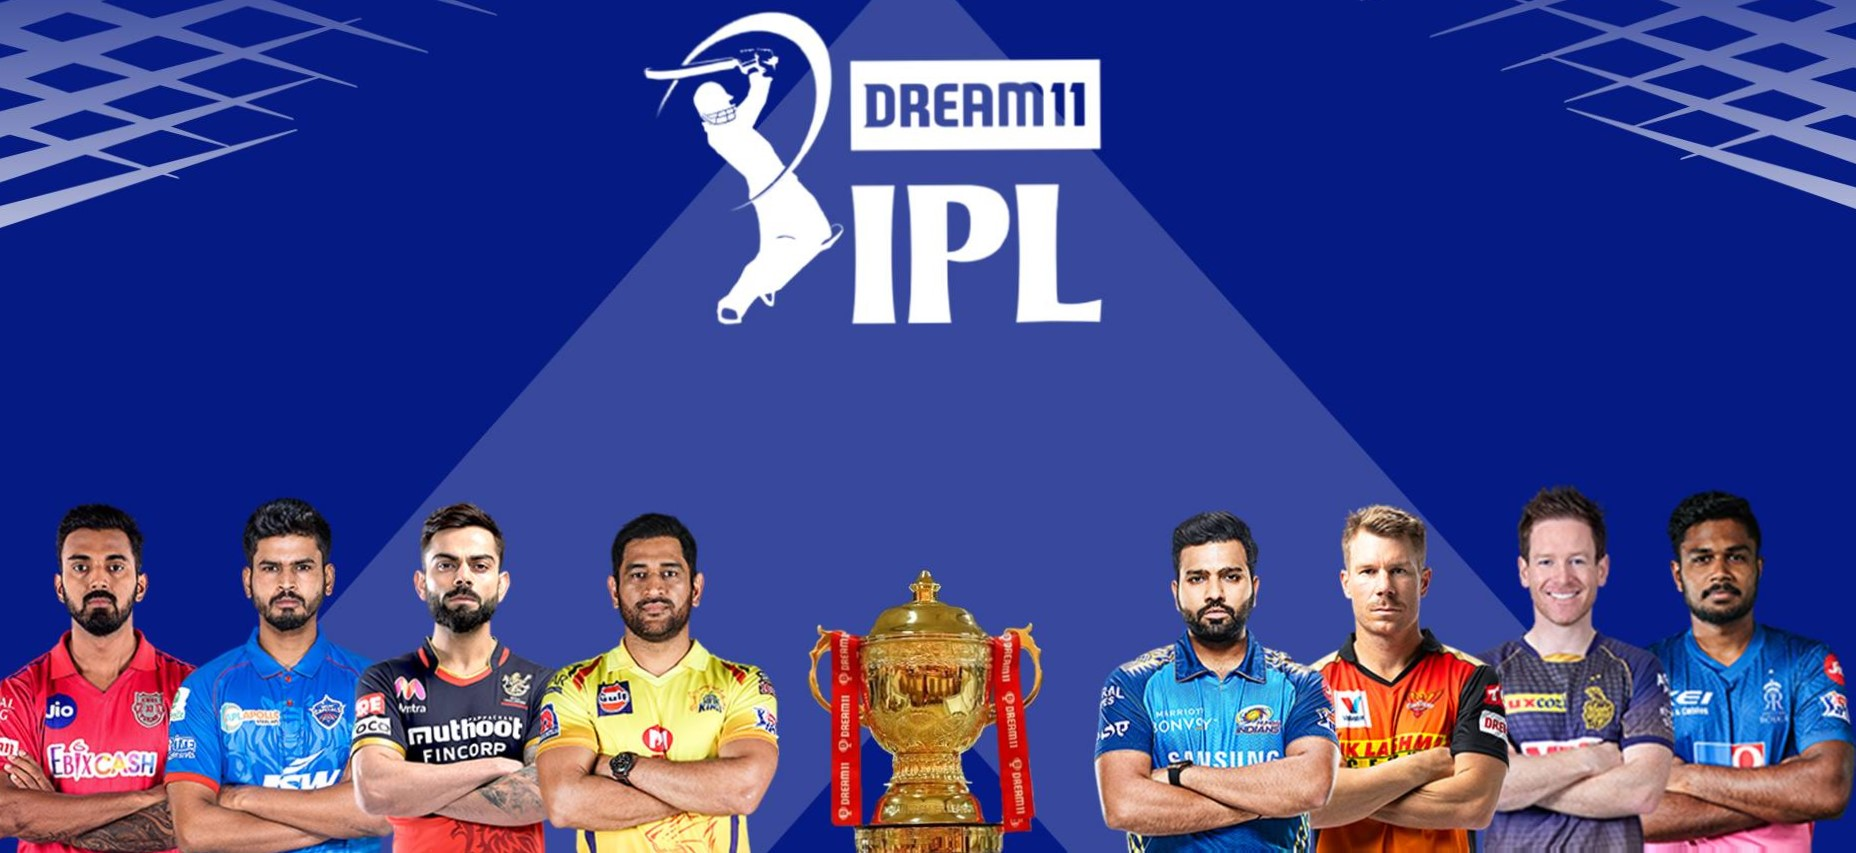

# Loading dataset along with importing libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
set_style='whitegrid'
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading datasets
deliveries = pd.read_csv(r'.\deliveries.csv')
matches = pd.read_csv(r'.\matches.csv')
avg_srate = pd.read_csv(r'.\most_runs_average_strikerate.csv')
players = pd.read_excel(r'.\Players.xlsx')
teams = pd.read_csv(r'.\teams.csv')
home_away = pd.read_csv(r'.\teamwise_home_and_away.csv')

# Data inspection part 🧐

## Inspecting 'deliveries' dataset

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


* This data is about the each ball delivered during each match.
* Here we have complete detail of each ball such as who is batsman, non-striker batsman, bowler, etc. at particular ball.
* As from above few rows, we can say that columns 'player_dismissed, dismissal_kind, fielder' contain NaN values which will be treated further as per requirement.

In [4]:
# getting shape of dataset
deliveries.shape

(179078, 21)

* Deliveries dataset contain 179078 rows and 21 columns

In [5]:
# getting information of data
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

* We can see that 13 columns are of integer type and 8 are of object or string type

In [6]:
# getting useful mathematical terms from data 
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Inspecting 'matches' dataset

In [7]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


* This dataset is about the match played during IPL.
* It contain detail about match such as date, teams, city, winner, man of the match, umpire names, etc.
* As from above few rows, we can say that columns 'umpire1, umpire2, umpire3' contain NaN values which will be treated further as per requirement.

In [8]:
# getting shape of data
matches.shape

(756, 18)

* Matches data conatin 756 rows and 18 columns

In [9]:
# getting information about data
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

* We can see that only 4 columns are of integer type and rest 14 are of object or string type

In [10]:
# getting useful mathematical terms from data
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


## Inspecting 'most_runs_average_strikerate' dataset

In [11]:
avg_srate.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


* This dataset is about the batsman
* It contain detail such as the strike rate, total runs, outs, balls played during matches, etc.
* As from above few rows, we can say that data may contain NaN values

In [12]:
# getting shape of dataset
avg_srate.shape

(516, 6)

* most_runs_average_strikerate dataset contain 516 rows and 6 columns

In [13]:
# getting information of dataset
avg_srate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


* We can see that out of 6 columns 3 are of integer type, 2 are of float type and 1 is of object or string type

In [14]:
# getting useful mathematical terms from data
avg_srate.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


## Inspecting 'Players' dataset

In [15]:
players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


* This data is about players.
* It contains information about players such as their name, dob, country, etc.
* As from above few rows, we can say that column country and dob contain NaN values which will be treated further as per our requirement

In [16]:
# getting shape of data
players.shape

(566, 5)

* Players dataset contain 566 rows and 5 columns

In [17]:
# getting information about data
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


* We can see that out of 5 columns only one is of datetime type and rest 4 are of object or string type.
* As it doesn't contain any integer or float type so we can't get mathematical terms from it.

## Inspecting 'teams' dataset

In [18]:
teams.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


* This dataset is about the names of teams which were the part of IPL

In [19]:
# getting shape of data
teams.shape

(15, 1)

* Teams dataset contain 15 rows and only 1 column

In [20]:
# getting data type of column
teams.dtypes

team1    object
dtype: object

* As we see that it has only one column viz. of object or string type
* As it doesn't contain any integer or float type so we can't get mathematical terms from it.

## Inspecting 'teamwise_home_and_away' dataset

In [21]:
home_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


* This data is about team's won at their home city or another city
* It contains information such as matches win at their home city, at another city, number of matches, etc.
* As from above few rows, we can say that data may contain NaN values

In [22]:
# getting shape of dataset
home_away.shape

(14, 7)

* teamwise_home_and_away dataset contain 14 rows and 7 columns

In [23]:
# getting information about data
home_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


* We can see that out of 7 columns 4 are of integer type, 2 are of float and 1 is of object or string type

In [24]:
# getting useful mathematical terms from data
home_away.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


Here, our inspection part for all 6 datasets over.
Let's start our data cleaning part from here

# Data Cleaning Part 🧹

## Cleaning 'deliveries' dataset

In [25]:
# row-wise null values count
deliveries.isnull().sum(axis=1)

0         3
1         3
2         3
3         3
4         3
         ..
179073    3
179074    3
179075    0
179076    3
179077    1
Length: 179078, dtype: int64

In [26]:
# row-wise null values percent
(deliveries.isnull().sum(axis=1)/len(deliveries)) * 100

0         0.001675
1         0.001675
2         0.001675
3         0.001675
4         0.001675
            ...   
179073    0.001675
179074    0.001675
179075    0.000000
179076    0.001675
179077    0.000558
Length: 179078, dtype: float64

* It is seen that the null values percent is very small. So, neglect it.

In [27]:
# column-wise null values count
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [28]:
# column-wise null values
(deliveries.isnull().sum()/len(deliveries)) * 100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

* As we can see, columns player_dismissed, dismissal_kind and fielder have 95%, 95% and 96% null values respectively.
* But we neither remove them nor do any imputation to fill these values.
* Let's abbreviate team names.

In [29]:
# getting unique team names
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [30]:
# creating list of unique team names along with their abbreviations
team = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals', 
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

abbre = ['SRH', 'RCB', 'MI', 'RPS', 'GL', 'KKR', 'KXIP', 'DC', 'CSK', 'RR', 'SRH', 'KTK', 'PW', 'RPS', 'DC']

In [31]:
# replacing team names with their abbreviation
deliveries.replace(team, abbre, inplace=True)

In [32]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


* Team names are abbreviated.
* As we see, these 18 columns will be useful during analysis and also they contain zero null values along with 3 columns that contain nearly 95% null values.
* This data is ready for analysis. Let's move towards next dataset.

## Cleaning 'matches' dataset

In [33]:
# row-wise null values count
matches.isnull().sum(axis=1)

0      1
1      1
2      1
3      1
4      3
      ..
751    0
752    0
753    3
754    0
755    0
Length: 756, dtype: int64

In [34]:
# row-wise null values percent
(matches.isnull().sum(axis=1)/len(matches)) * 100

0      0.132275
1      0.132275
2      0.132275
3      0.132275
4      0.396825
         ...   
751    0.000000
752    0.000000
753    0.396825
754    0.000000
755    0.000000
Length: 756, dtype: float64

* As we see, mtaches dataset's rows contain nearly zero percent values.
* So, we can ignore them and they will not affect our analysis

In [35]:
# column-wise null values count
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [36]:
(matches.isnull().sum()/len(matches)) * 100

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

* As we see only 'umpire3'column contain 84% null values.
* As we know matches dataset contain information about matches. So, we can remove all umpire details because they are not useful for our analysis.
* And along with umpire names venue detail is also not useful. So, we remove it.

In [37]:
matches.drop(['umpire3'], axis=1, inplace=True)

In [38]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

* Less useful columns are removed from dataset.

In [39]:
# getting unique season name
matches['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [40]:
# stripping out IPL word from season 
matches.replace({'IPL-2008': 2008, 'IPL-2009': 2009, 'IPL-2010': 2010, 'IPL-2011': 2011, 'IPL-2012': 2012,
                 'IPL-2013': 2013, 'IPL-2014': 2014, 'IPL-2015': 2015, 'IPL-2016': 2016, 'IPL-2017': 2017,
                 'IPL-2018': 2018, 'IPL-2019': 2019}, inplace=True)

# changing data type of season from object to int
matches['Season'] = pd.to_numeric(matches['Season'])

In [41]:
matches['Season'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Season, dtype: int64

* Successfully replaced season with year and to integer data type

In [42]:
# getting unique team names
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [43]:
# replace team names with their abbreviations
matches.replace(team, abbre, inplace=True) # team and abbre from deliveries dataset

In [44]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


* As we see, these 14 columns will be useful for analysis and also they contain nearly zero percent null values.
* Let's check for unique city names.

In [45]:
# getiing unique city names
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

* As we see, Bangalore is present. 
* Let's replace it with its new name Bengaluru.

In [46]:
# replacing Bangalore with Bengaluru
matches.replace('Bangalore', 'Bengaluru', inplace=True)

In [47]:
# checking for city
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

* Bangalore is replaced with Bengaluru.
* Let's move towards next dataset.

## Cleaning 'most_runs_average_strikerate' dataset

In [48]:
# row-wise null values count
avg_srate.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
511    0
512    0
513    0
514    0
515    0
Length: 516, dtype: int64

In [49]:
# row-wise null values percent
(avg_srate.isnull().sum(axis=1)/len(avg_srate)) * 100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
511    0.0
512    0.0
513    0.0
514    0.0
515    0.0
Length: 516, dtype: float64

* As we see, there is zero null values in rows.

In [50]:
# column-wise null values count
avg_srate.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [51]:
# column-wise null values percent
(avg_srate.isnull().sum()/len(avg_srate)) * 100

batsman          0.000000
total_runs       0.000000
out              0.000000
numberofballs    0.000000
average          6.589147
strikerate       0.000000
dtype: float64

* As we see 'average' column contain nearly 6.6% null values which can be ignored.
* But 'average' will be a useful column during our analysis.
* So, we try to fill these null values by either mean or median.
* But, before it we check average column's max value, min value and few more.

In [52]:
avg_srate['average'].head(40)

0     35.697368
1     33.662500
2     30.447205
3     41.377193
4     33.583942
5     41.136364
6     37.711864
7     28.333333
8     42.442308
9     31.485075
10    32.769231
11    26.586957
12    31.217391
13    29.061404
14    29.290909
15    27.226415
16    22.551181
17    30.052632
18    27.176471
19    25.275229
20    27.836735
21    27.838710
22    38.292308
23    27.269663
24    29.444444
25    32.873239
26    28.037975
27    28.233766
28    27.223684
29    34.542373
30    41.448980
31    40.571429
32    38.019231
33    23.265060
34    33.232143
35    34.407407
36    28.250000
37    23.878378
38    36.061224
39    26.378788
Name: average, dtype: float64

In [53]:
avg_srate['average'].tail(40)

476    1.0
477    2.0
478    NaN
479    2.0
480    2.0
481    NaN
482    0.5
483    2.0
484    2.0
485    1.0
486    NaN
487    0.5
488    1.0
489    NaN
490    NaN
491    1.0
492    1.0
493    NaN
494    NaN
495    1.0
496    1.0
497    NaN
498    1.0
499    1.0
500    0.0
501    0.0
502    NaN
503    NaN
504    NaN
505    0.0
506    0.0
507    0.0
508    NaN
509    NaN
510    0.0
511    0.0
512    0.0
513    0.0
514    0.0
515    0.0
Name: average, dtype: float64

In [54]:
# getting max value of avearge
avg_srate['average'].max()

88.0

In [55]:
# getting min value of average
avg_srate['average'].min()

0.0

In [56]:
# getting mean value of average
avg_srate['average'].mean()

16.35507443905886

In [57]:
# getting mean value of median
avg_srate['average'].median()

14.607142857142858

* After seeing these values, we conclude that none of them will help us.
* Because last entries are 0. If we replace them with one of the above value will create some discrepancy in our data.
* So, we directly find out average by below formula:
>                     total number of runs ÷ number of out

In [58]:
# replacing null values with above formula values
avg_srate['average'] = round((avg_srate['total_runs'] / avg_srate['out']), 6)

* Let's confirm that all values are replaced by mean or not.

In [59]:
(avg_srate['average'].isnull().sum()/len(avg_srate)) * 100

0.9689922480620154

* As we can see, average column contain nearly 1% null values after some imputation which is  due to 0 runs divide by 0 out. It results in a indeterminate form which is represented as NaN.
* Let's move towards our next dataset.

## Cleaning 'Players' dataset

In [60]:
# row-wise null values count
players.isnull().sum(axis=1)

0      0
1      0
2      0
3      2
4      2
      ..
561    0
562    0
563    0
564    1
565    0
Length: 566, dtype: int64

In [61]:
# row-wise null values percent
(players.isnull().sum(axis=1)/len(players)) * 100

0      0.000000
1      0.000000
2      0.000000
3      0.353357
4      0.353357
         ...   
561    0.000000
562    0.000000
563    0.000000
564    0.176678
565    0.000000
Length: 566, dtype: float64

* As we see, players dataset contain nearly zero percent null values which can be ignored.
* Because they doesn't affect our analysis.

In [62]:
# column-wise null values count
players.isnull().sum()

Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

In [63]:
# column-wise null values percent
(players.isnull().sum()/len(players)) * 100

Player_Name       0.000000
DOB              16.784452
Batting_Hand      0.530035
Bowling_Skill    11.307420
Country          16.784452
dtype: float64

* As we see dob, country and bowling_skill column contain more than 10% null values.
* As we can't fill these values with any parameter. So, we leave them as it is.

In [64]:
# getting unique values of batting_hand
players['Batting_Hand'].unique()

array(['Right_Hand', 'Right_hand', 'Left_Hand', nan], dtype=object)

In [65]:
# replace Right_hand with Right_Hand
players.replace('Right_hand', 'Right_Hand', inplace=True)

In [66]:
# checking unique values of batting_hand
players['Batting_Hand'].unique()

array(['Right_Hand', 'Left_Hand', nan], dtype=object)

In [67]:
# getting unique entries of bowling skill
players['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', nan, 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler', 'Right-arm Medium',
       'Right-arm Fast'], dtype=object)

In [68]:
# replacing entries with similar names
players.replace({'Right-arm Fast': 'Right-arm fast', 'Right-arm Medium': 'Right-arm medium'}, inplace=True)

In [69]:
# checking unique values of bowling skills
players['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', nan, 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler'], dtype=object)

## Cleaning 'teams' dataset

In [70]:
# row-wise null values count
teams.isnull().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

* As we see, it contain zero null values. 

In [71]:
# column-wise null values count
teams.isnull().sum()

team1    0
dtype: int64

* As we see, column also contain zero null values. So, we don't need to do any changes.
* Let's abbreviate team names.

In [72]:
# getting unique team names
teams['team1'].unique()

array(['Pune Warriors', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Gujarat Lions', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Delhi Daredevils', 'Deccan Chargers',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kings XI Punjab'], dtype=object)

In [73]:
# replace team names with their abbreviation
teams.replace(team, abbre, inplace=True)

In [74]:
teams

,team1
0,PW
1,KKR
2,RR
3,KTK
4,GL
5,CSK
6,RPS
7,DC
8,SRH
9,DC


* Team names are abbreviated.
* Let's move to our next dataset.

## Cleaning 'teamwise_home_and_away' dataset

In [75]:
# row-wise null values count
home_away.isnull().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

* As we see, it contain zero null values.

In [76]:
# column-wise null values
home_away.isnull().sum()

team                   0
home_wins              0
away_wins              0
home_matches           0
away_matches           0
home_win_percentage    0
away_win_percentage    0
dtype: int64

* As we see, columns also contain zero null values. So, we don't need to do any changes.

In [77]:
# getting unique team name
home_away['team'].unique()

array(['Rising Pune Supergiant', 'Mumbai Indians', 'Chennai Super Kings',
       'Delhi Capitals', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Pune Warriors', 'Kochi Tuskers Kerala',
       'Gujarat Lions'], dtype=object)

In [78]:
# replacing team name with their abbreviations
home_away.replace(team, abbre, inplace=True)

In [79]:
home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,DC,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222
5,RR,29,46,67,80,43.283582,57.500000
6,SRH,18,11,43,32,41.860465,34.375000
7,KXIP,38,44,91,85,41.758242,51.764706
8,RCB,35,49,85,95,41.176471,51.578947
9,KKR,34,58,83,95,40.963855,61.052632


Till now we had inspected our 6 datasets. We made some changes like removing some columns, filling null values, etc. Now, its time for our main purpose i.e. EDA(Exploratory Data Analysis). Let's begin our analysis tour from here and get some meaningful insights from our dataset

# Analysis Part 📈 📊

## EDA on 'deliveries' dataset

In [80]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Getting Top 10 Batsmen.

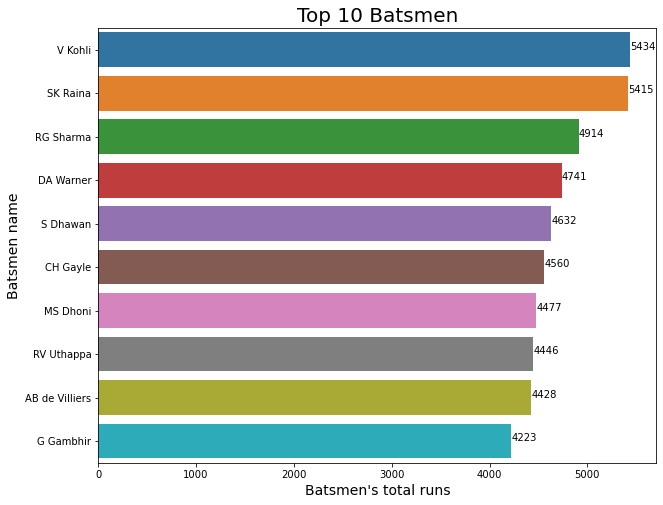

In [81]:
# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = deliveries.groupby('batsman').sum()['batsman_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen', fontsize=20)
plt.xlabel('Batsmen\'s total runs', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see, 
* **Virat Kohli** is on the top of this list with a score of 5434.
* **Suresh Raina** is on the second number with a score of 5415. 

### Getting Top 10 Batsmen with the highest number of 6's

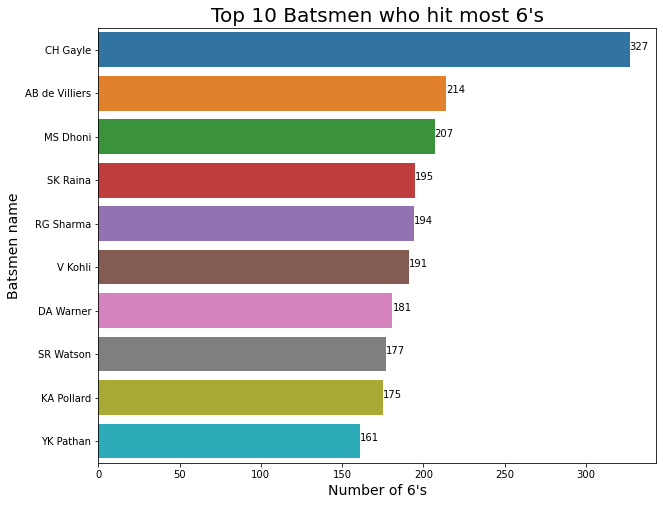

In [82]:
# creating new dataframe which contain 6's 
six_df = deliveries[deliveries['batsman_runs'] == 6]

# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = six_df.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen who hit most 6\'s', fontsize=20)
plt.xlabel('Number of 6\'s', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Chris Gayle** has the highest number of 6's with a score of 327.
* **AB de Villers** is on the second position with a score of214.

### Getting Top 10 Batsmen with the highest number of 4's

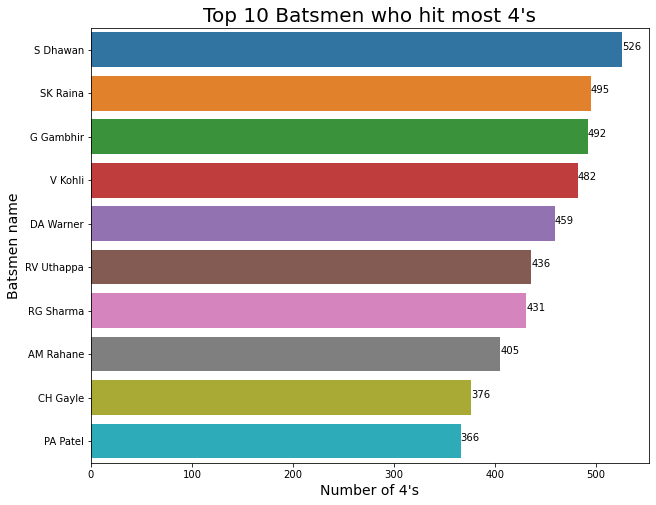

In [83]:
# creating new dataframe which contain 4's 
six_df = deliveries[deliveries['batsman_runs'] == 4]

# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = six_df.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen who hit most 4\'s', fontsize=20)
plt.xlabel('Number of 4\'s', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Shikhar Dhawan** is at the top of list with a score of 526.
* **Suresh Raina** is at the second position with a score of 495.

### Getting Top 10 Batsmen with the highest number of balls faced

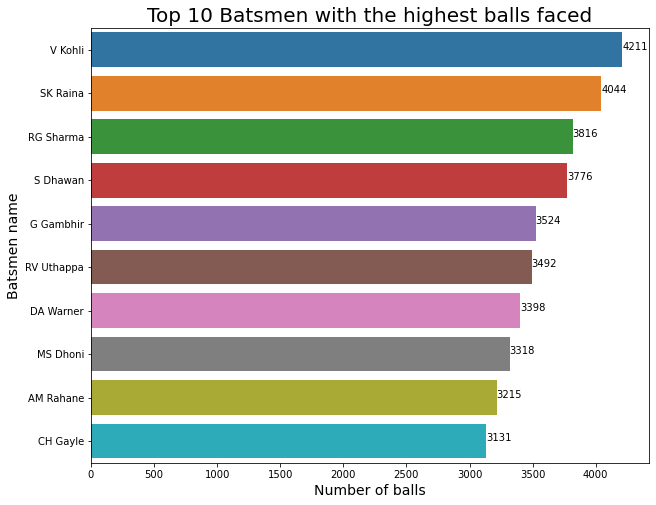

In [84]:
# plotting ball with batsman
plt.figure(figsize=(10,8))
x = deliveries.groupby('batsman').count()['ball'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen with the highest balls faced', fontsize=20)
plt.xlabel('Number of balls', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Virat Kohli** has faced the highest number of balls with a score of 4211.
* **Suresh Raina** is on the second position with a score of 4044.
* It is also seen that these two guys has also score more than others.

### Getting Top 10 Batsmen who scored high in last 4 overs

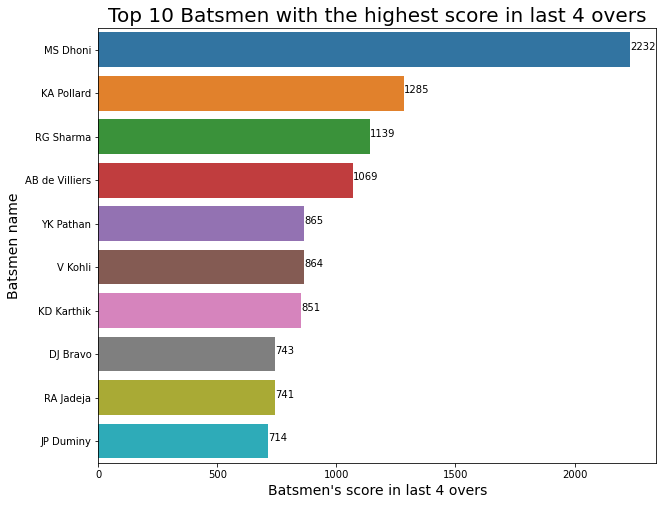

In [85]:
# creating dataframe for last 4 overs
last_over = deliveries[(deliveries['over'] == 17) | (deliveries['over'] == 18) | (deliveries['over'] == 19) | (deliveries['over'] == 20)]

# plotting batsmen with last_over score
plt.figure(figsize=(10,8))
x = last_over.groupby('batsman').sum()['batsman_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen with the highest score in last 4 overs', fontsize=20)
plt.ylabel('Batsmen name', fontsize=14)
plt.xlabel('Batsmen\'s score in last 4 overs', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **MS Dhoni** has the highest score in last 4 overs of 2232.
* **Kieron Pollard** is on second position in this list with a score of 1285.

## EDA on 'matches' dataset

In [86]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,08-04-2017,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


### Getting Top 5 teams who won most matches

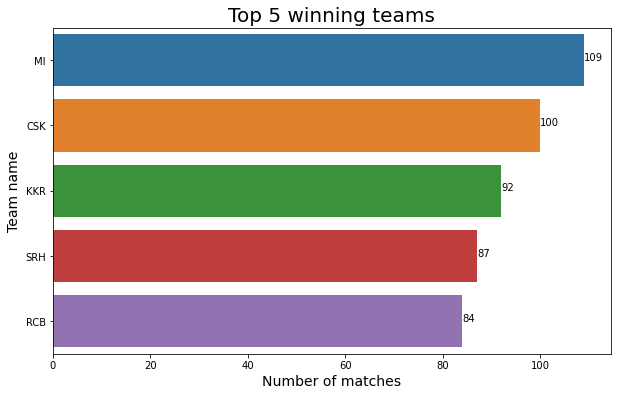

In [87]:
# plotting winner with id
plt.figure(figsize=(10,6))
x = matches.groupby('winner').count()['id'].sort_values(ascending=False)[:5]
sns.barplot(x.values, x.index)
plt.title('Top 5 winning teams', fontsize=20)
plt.xlabel('Number of matches', fontsize=14)
plt.ylabel('Team name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Mumbai Indians** won the highest number of matches 109.
* **Chennai Super Kings** is on second position with number of matches 100.

### Getting Top 10 cities where most matches played

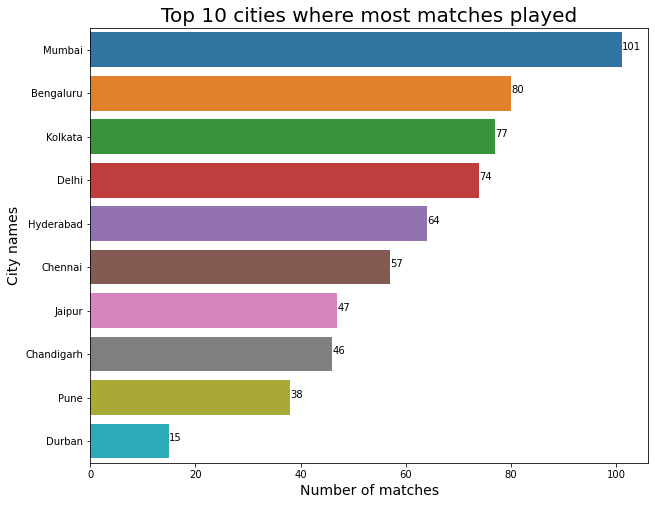

In [88]:
# plotting city with id
plt.figure(figsize=(10,8))
x = matches.groupby('city').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 cities where most matches played', fontsize=20)
plt.xlabel('Number of matches', fontsize=14)
plt.ylabel('City names', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Mumbai** has hosted the highest number of matches.
* **Bengaluru** is on second position.

### Getting Top 10 stadiums where most matches played

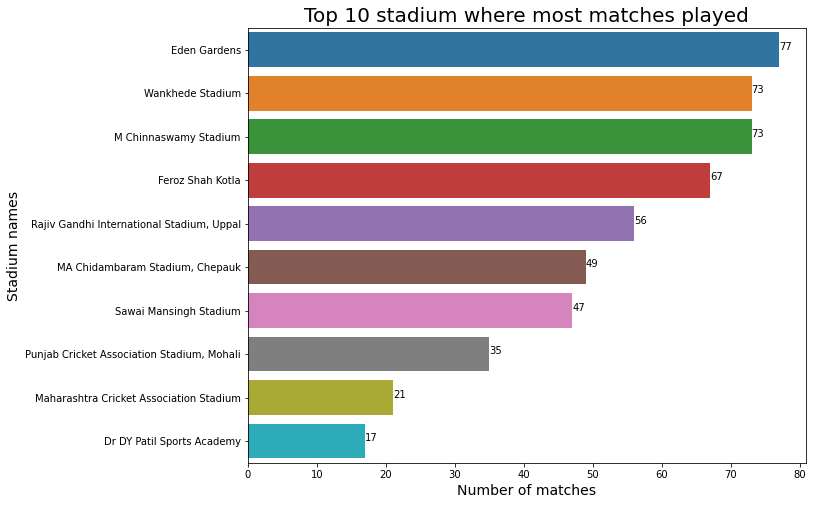

In [89]:
# plotting city with id
plt.figure(figsize=(10,8))
x = matches.groupby('venue').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 stadium where most matches played', fontsize=20)
plt.xlabel('Number of matches', fontsize=14)
plt.ylabel('Stadium names', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Eden Gardens, Kolkata** has hosted the highest number of matches.
* **Wankhede Stadium, Mumbai** is on second position.

### Getting number of times The Duckworth–Lewis–Stern method  applied in each season

**Duckworth–Lewis–Stern method**
>The Duckworth–Lewis–Stern method is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match interrupted by weather or other circumstances

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


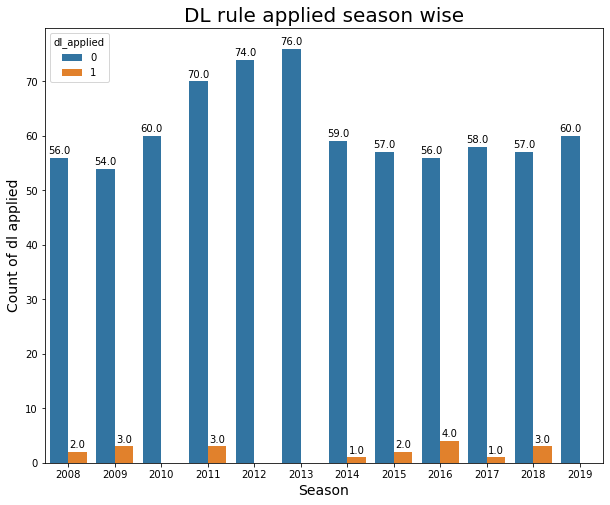

In [90]:
# plotting dl_applied with season
plt.figure(figsize=(10,8))
ax = sns.countplot(x=matches['Season'], hue=matches['dl_applied'])
plt.title('DL rule applied season wise', fontsize=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count of dl applied', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

* It is observed that DL rule is mostly applied in **2016**.
* It is also seen that DL rule is applied same number of times in year **2009**, **2011** and **2008**.

### Getting Top 10 Man of the match in all matches

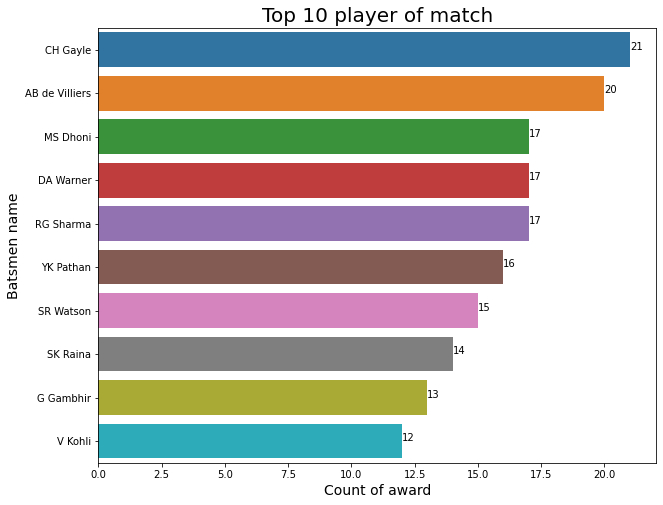

In [91]:
#plotting player_of_match with id
plt.figure(figsize=(10,8))
x = matches.groupby('player_of_match').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 player of match', fontsize=20)
plt.xlabel('Count of award', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

As we see,
* **Chris Gayle** is on the top of this list with 21 awards.
* **AB de Villiers** is on second position with 20 awards.

### Getting number of times team choose to bat after winning toss

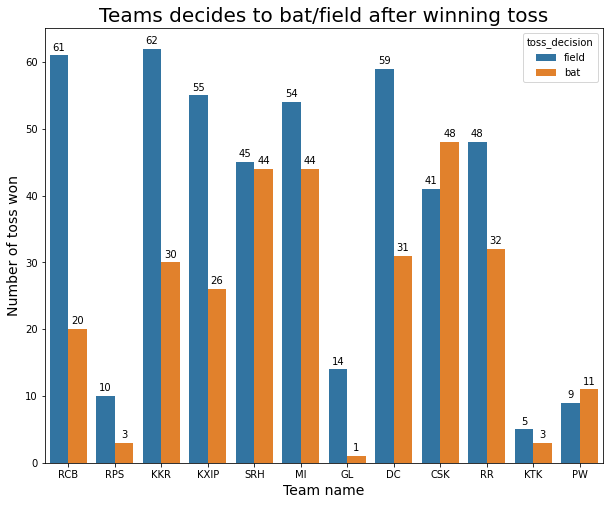

In [92]:
# plotting toss_winner with toss_decision
plt.figure(figsize=(10,8))
ax = sns.countplot(matches['toss_winner'], hue=matches['toss_decision'])
plt.title('Teams decides to bat/field after winning toss', fontsize=20)
plt.xlabel('Team name', fontsize=14)
plt.ylabel('Number of toss won', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see,
* **KKR** chose to field in 62 toss won cases.
* It is observed that **CSK** chose to bat more than field after winning toss.
* **SRH** has nearly equal decision of bat or field after toss won.

### Getting Top 5 umpires

In [93]:
ump=pd.concat([matches['umpire1'],matches['umpire2']])
ump=ump.value_counts()
ump.head()

S Ravi             106
HDPK Dharmasena     87
C Shamshuddin       73
AK Chaudhary        58
SJA Taufel          55
dtype: int64

As we see,
* **Sundaram Ravi** is on the top of the list.
* **Handunnettige Deepthi Priyantha Kumar Dharmasena** is on second position. 

## EDA on 'most_runs_average_strikerate' dataset

In [94]:
avg_srate.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


### Getting Top 10 batsman with high strike rate

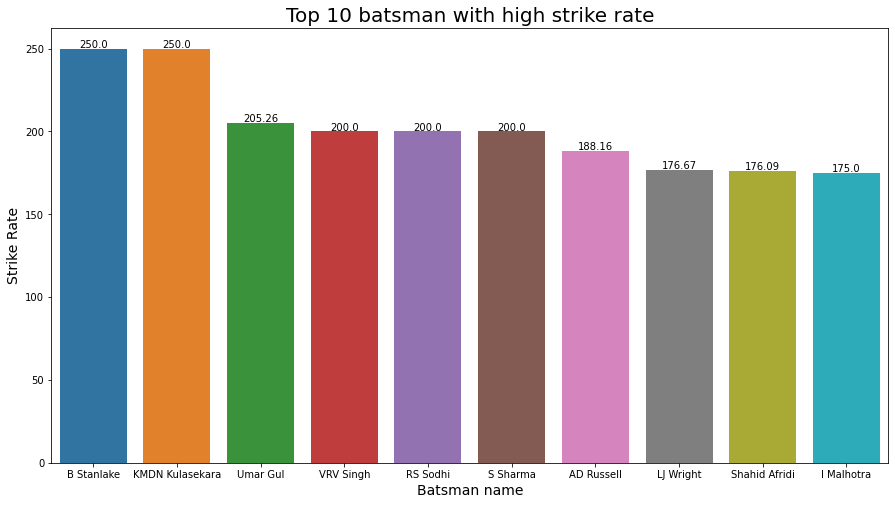

In [95]:
# plotting batsman with strikerate
plt.figure(figsize=(15,8))
x = round(avg_srate.sort_values('strikerate', ascending=False)[:10], 2)
ax = sns.barplot(x['batsman'], x['strikerate'])
plt.title('Top 10 batsman with high strike rate', fontsize=20)
plt.ylabel('Strike Rate', fontsize=14)
plt.xlabel('Batsman name', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see, 
* **Billy Stanlake** and **Kulasekara Mudiyanselage Dinesh Nuwan Kulasekara** are on the top of list with strike rate of 250.

### Getting Top 10 batsman with the highest average

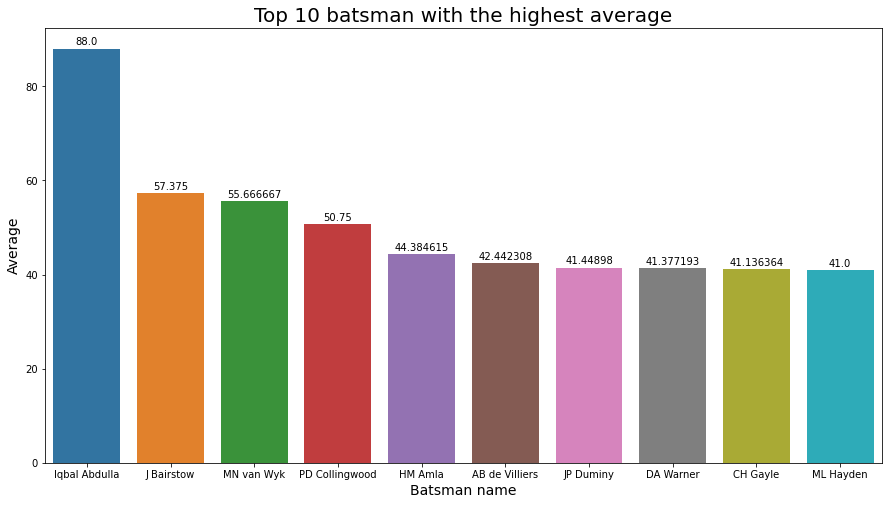

In [96]:
# plotting batsman with average
plt.figure(figsize=(15,8))
x = avg_srate.sort_values('average', ascending=False)[29:39]
ax =ax = sns.barplot(x['batsman'], x['average'])
plt.title('Top 10 batsman with the highest average', fontsize=20)
plt.xlabel('Batsman name', fontsize=14)
plt.ylabel('Average', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center') 

As we see, 
* **Iqbal Abdulla** is on the top of this list with average of 88.
* **Jonny Bairstow** is on second position with average of 57.4.

### Getting Top 10 batsman with the highest number of outs

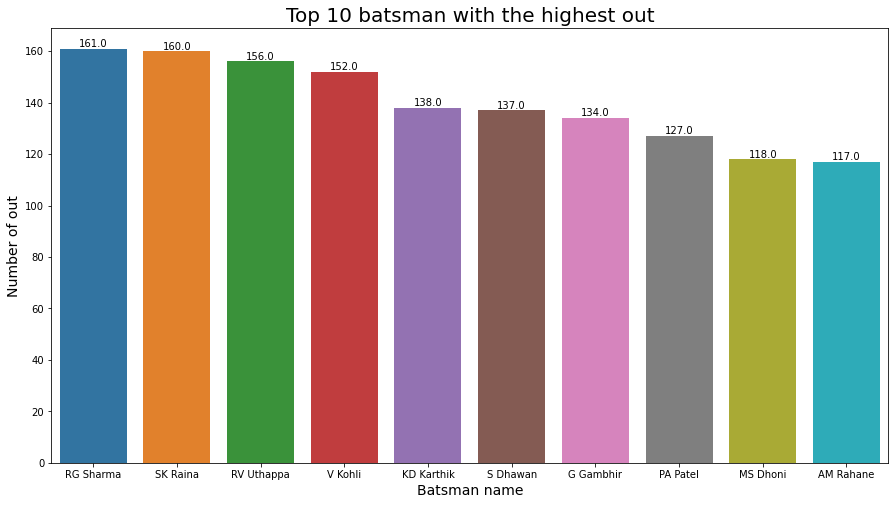

In [97]:
# plotting batsman with out
plt.figure(figsize=(15,8))
x = avg_srate.sort_values('out', ascending=False)[:10]
ax = sns.barplot(x['batsman'], x['out'])
plt.title('Top 10 batsman with the highest out', fontsize=20)
plt.xlabel('Batsman name', fontsize=14)
plt.ylabel('Number of out', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see,
* **Rohit Sharma** is on the top of this list with total 161 out.
* **Suresh Raina** is on second position with 160 out.

### Getting Top 10 batsman with the higest score

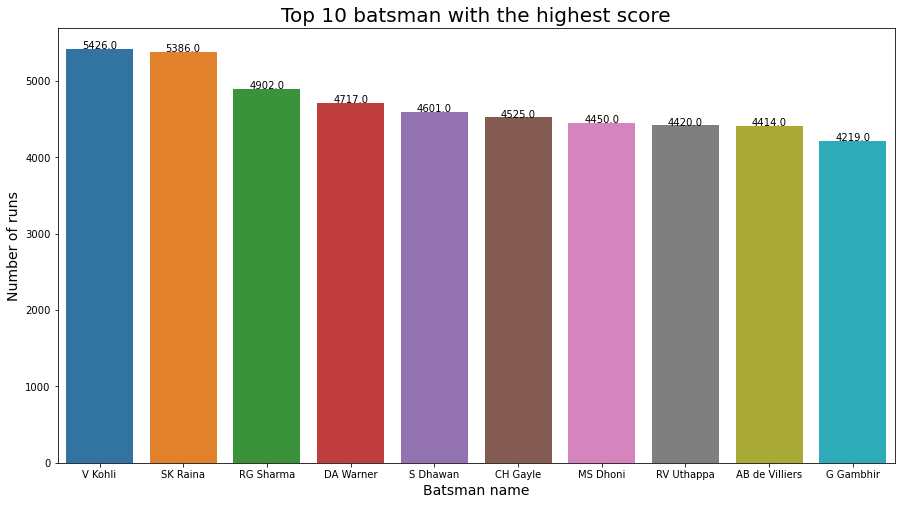

In [98]:
# plotting batsman with out
plt.figure(figsize=(15,8))
x = avg_srate.sort_values('total_runs', ascending=False)[:10]
ax = sns.barplot(x['batsman'], x['total_runs'])
plt.title('Top 10 batsman with the highest score', fontsize=20)
plt.xlabel('Batsman name', fontsize=14)
plt.ylabel('Number of runs', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see, 
* **Virat Kohli** is on the top with a score of 5426.
* **Suresh Raina** is on second position with a score of 5386.

### Getting Top 10 batsman who faced the highest number of balls

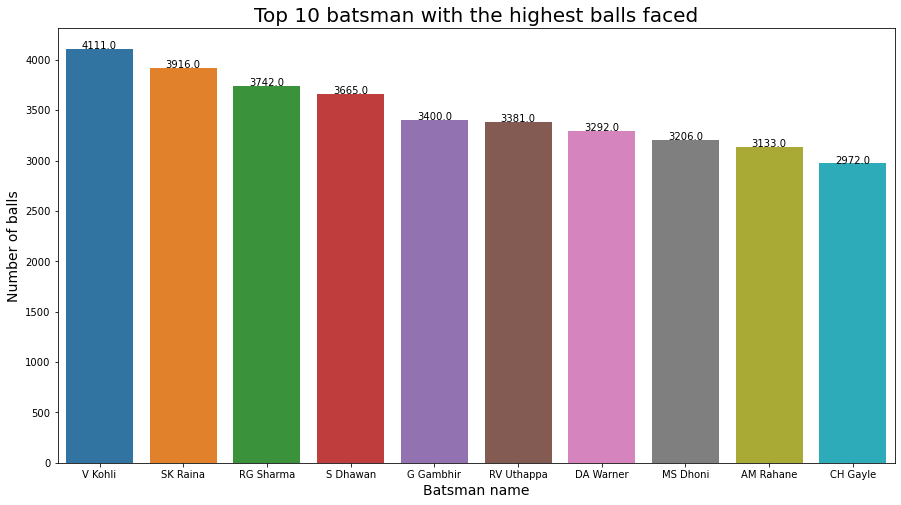

In [99]:
# plotting batsman with out
plt.figure(figsize=(15,8))
x = avg_srate.sort_values('numberofballs', ascending=False)[:10]
ax = sns.barplot(x['batsman'], x['numberofballs'])
plt.title('Top 10 batsman with the highest balls faced', fontsize=20)
plt.xlabel('Batsman name', fontsize=14)
plt.ylabel('Number of balls', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see, 
* **Virat Kohli** is on the first position with 4111 balls.
* **Suresh Raina** is on the second position with 3916 balls.

## EDA on 'Players' dataset

In [100]:
players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_Hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


### Getting number of players from each country

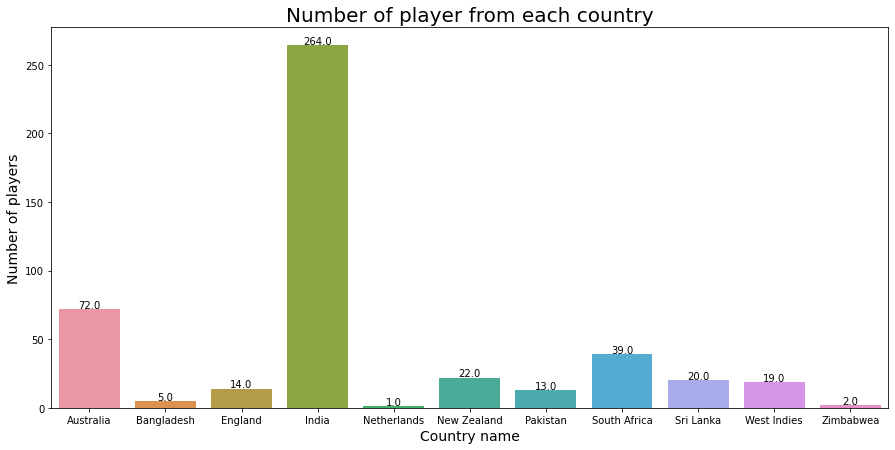

In [101]:
# number of players from each country
plt.figure(figsize=(15,7))
x = players.groupby('Country').count()['Player_Name']
ax = sns.barplot(x.index, x.values)
plt.title('Number of player from each country', fontsize=20)
plt.xlabel('Country name', fontsize=14)
plt.ylabel('Number of players', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see,
* Most of the players are from **India** i.e. 264.
* After India, **Australia** has higher number of players than other countries i.e. 72.

### Getting number of players who plays with right or left hand

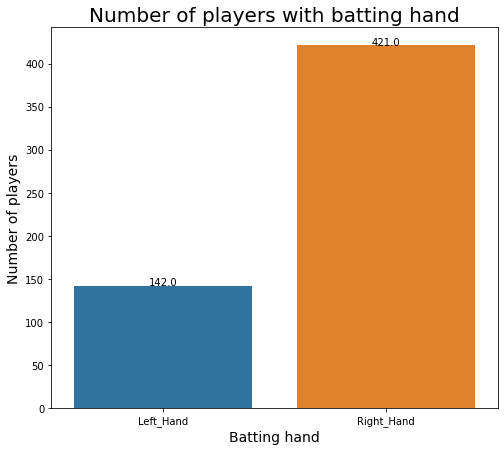

In [102]:
# number of players with their batting hand
plt.figure(figsize=(8, 7))
x = players.groupby('Batting_Hand').count()['Player_Name']
ax = sns.barplot(x.index, x.values)
plt.title('Number of players with batting hand', fontsize=20)
plt.xlabel('Batting hand', fontsize=14)
plt.ylabel('Number of players', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

* It is observed that **421** players are play with their right hand and **142** players play with their left hand.

### Getting number of players with respective bowling skills

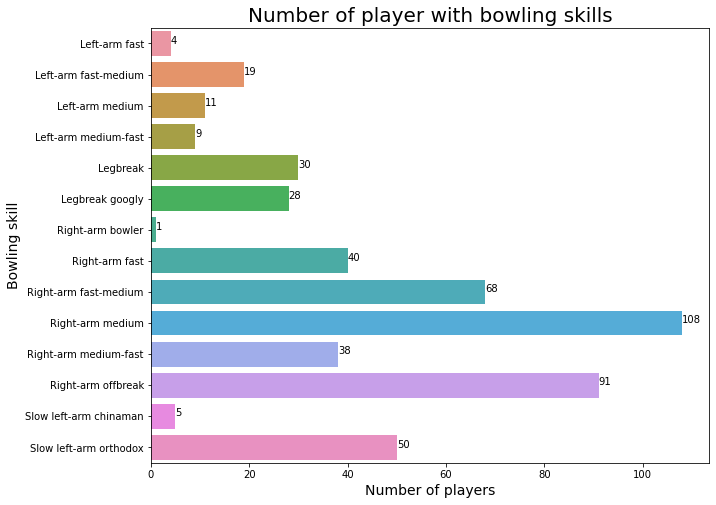

In [103]:
# number of players with their bowling skills
plt.figure(figsize=(10,8))
x = players.groupby('Bowling_Skill').count()['Player_Name']
ax = sns.barplot(x.values, x.index)
plt.title('Number of player with bowling skills', fontsize=20)
plt.ylabel('Bowling skill', fontsize=14)
plt.xlabel('Number of players', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

* **108** players have **Right-arm medium** bowling skill.

## EDA on 'teamwise_home_and_away' dataset

In [104]:
home_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,DC,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222


### Getting Top teams with the highest winning %age at home ground

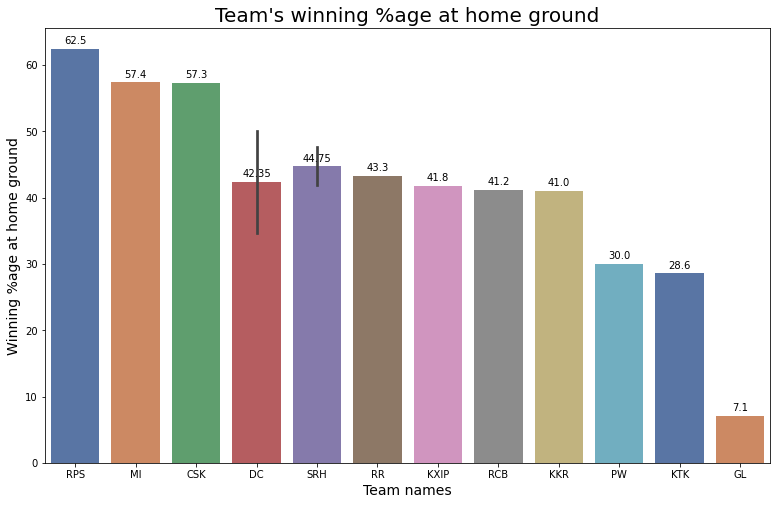

In [105]:
# plotting team with home_win_percentage
plt.figure(figsize=(13,8))
ax = sns.barplot(home_away['team'], round(home_away['home_win_percentage'],1), palette='deep')
plt.title('Team\'s winning %age at home ground', fontsize=20)
plt.xlabel('Team names', fontsize=14)
plt.ylabel('Winning %age at home ground', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

* Team **RPS** has the highest winning %age at home ground.
* Team **GL** has the lowest winning %age at home ground.

### Getting Top teams with the highest winning %age at other ground

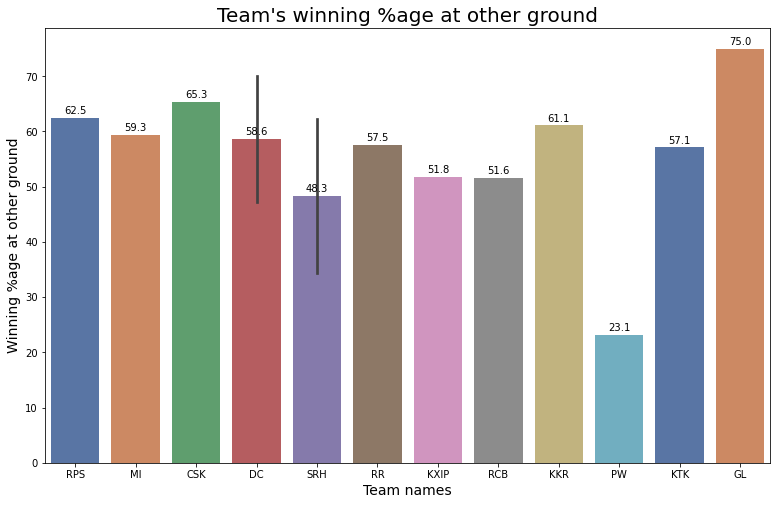

In [106]:
# plotting team with home_win_percentage
plt.figure(figsize=(13,8))
ax = sns.barplot(home_away['team'], round(home_away['away_win_percentage'],1), palette='deep')
plt.title('Team\'s winning %age at other ground', fontsize=20)
plt.xlabel('Team names', fontsize=14)
plt.ylabel('Winning %age at other ground', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

* Team **GL** has the highest winning %age at other ground.
* Team **PW** has the lowest winning %age at other ground.
* It is observed that team **GL** has chances of winning at their home ground is less but on other groud is high.

### Getting which team won most matches at home ground

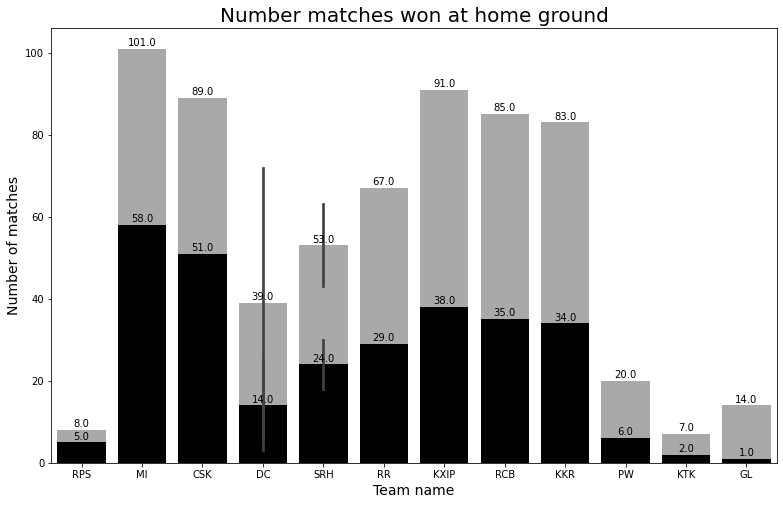

In [107]:
# plotting team with home_wins and home_matches
plt.figure(figsize=(13,8))
s1 = sns.barplot(home_away['team'], home_away['home_matches'], color='darkgray')
s2 = sns.barplot(home_away['team'], home_away['home_wins'], color='black')
plt.title('Number matches won at home ground', fontsize=20)
plt.xlabel('Team name', fontsize=14)
plt.ylabel('Number of matches', fontsize=14)

for rect in s1.patches:
    s1.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see,
* **MI** has played **101** matches at home ground and won **58** match from them.
* **GL** has played **14** matches at home ground and won only **1** match from them.

### Getting which team won most matches at other ground

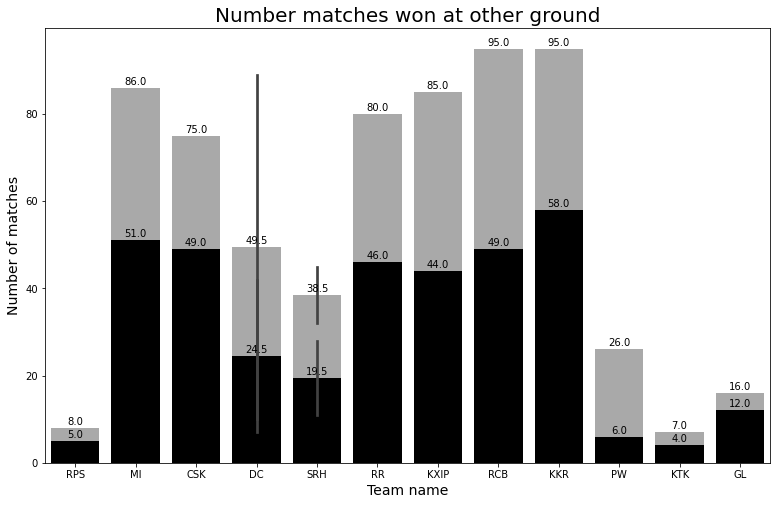

In [108]:
# plotting team with away_wins and away_matches
plt.figure(figsize=(13,8))
s1 = sns.barplot(home_away['team'], home_away['away_matches'], color='darkgray')
s2 = sns.barplot(home_away['team'], home_away['away_wins'], color='black')
plt.title('Number matches won at other ground', fontsize=20)
plt.xlabel('Team name', fontsize=14)
plt.ylabel('Number of matches', fontsize=14)

for rect in s1.patches:
    s1.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see,
* **RCB** and **KKR** played **95** matches at other ground among them they won **49** and **58** matches respectively.
* **GL** played **16** matches at other ground and won **12** match from them.

## Merge 'deliveries' dataset with 'matches'

In [109]:
# first rename match_id with id in deliveries dataset
deliveries.rename(columns={'match_id': 'id'}, inplace=True)

In [110]:
# creating season column in deliveries dataset
deli_match = matches[['id','Season','date']].merge(deliveries, left_on = 'id',right_on = 'id',how = 'left')
deli_match.head()

,id,Season,date,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,05-04-2017,1,SRH,RCB,1,1,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,05-04-2017,1,SRH,RCB,1,2,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,05-04-2017,1,SRH,RCB,1,3,DA Warner,S Dhawan,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,05-04-2017,1,SRH,RCB,1,4,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,05-04-2017,1,SRH,RCB,1,5,DA Warner,S Dhawan,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Getting total runs in each season

Text(0, 0.5, 'Total runs')

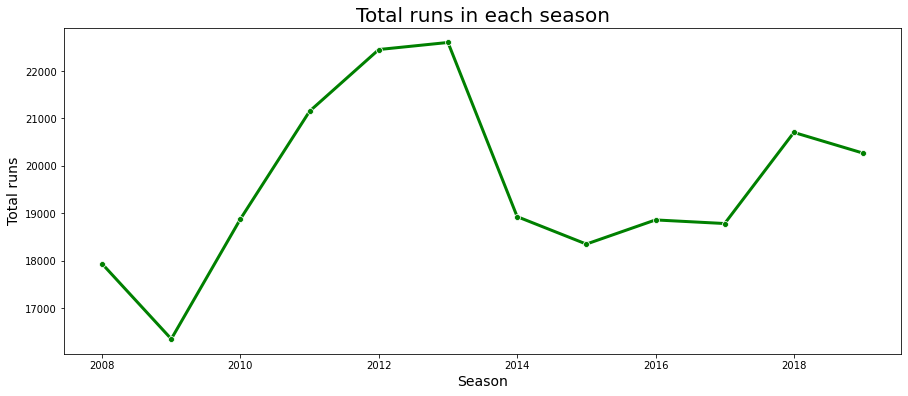

In [111]:
# plotting season with total_runs
plt.figure(figsize=(15,6))
x = deli_match.groupby('Season')['total_runs'].sum()
sns.lineplot(x.index, x.values, marker='o', color='green', linewidth=3)
plt.title('Total runs in each season', fontsize=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total runs', fontsize=14)

* It is observed that the highest runs were scored in **2013** and the lowest runs were in **2009**.

### Getting average powerplay runs

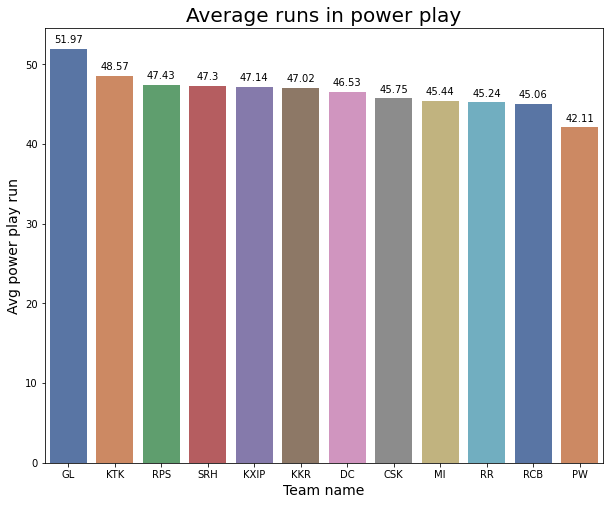

In [112]:
# plotting team with total_runs in starting 6 overs
plt.figure(figsize=(10,8))
df = deli_match[deli_match['over']<=6].groupby(['id','batting_team'])['total_runs'].sum()
x = df.groupby('batting_team').mean().sort_values(ascending = False)
ax = sns.barplot(x.index,round(x,2), palette='deep')
plt.title('Average runs in power play', fontsize=20)
plt.xlabel('Team name', fontsize=14)
plt.ylabel('Avg power play run', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

* It is observed that **GL** has the highest average power play runs.